In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [17]:
import numpy as np
from scipy.spatial import distance_matrix
from gurobipy import *
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon, Point
from numpy import random

def generate_candidate_sites(points,M=100):
    '''
    Generate M candidate sites with the convex hull of a point set
    Input:
        points: a Numpy array with shape of (N,2)
        M: the number of candidate sites to generate
    Return:
        sites: a Numpy array with shape of (M,2)
    '''
    hull = ConvexHull(points)
    polygon_points = points[hull.vertices]
    poly = Polygon(polygon_points)
    min_x, min_y, max_x, max_y = poly.bounds
    sites = []
    while len(sites) < M:
        random_point = Point([random.uniform(min_x, max_x),
                                random.uniform(min_y, max_y)])
        if (random_point.within(poly)):
            sites.append(random_point)
    return np.array([(p.x,p.y) for p in sites])

def mclp(points,K,radius,M):
    """
    Solve maximum covering location problem
    Input:
        points: input points, Numpy array in shape of [N,2]
        K: the number of sites to select
        radius: the radius of circle
        M: the number of candidate sites, which will randomly generated inside
        the ConvexHull wrapped by the polygon
    Return:
        opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
        f: the optimal value of the objective function
    """
    print('----- Configurations -----')
    print('  Number of points %g' % points.shape[0])
    print('  K %g' % K)
    print('  Radius %g' % radius)
    print('  M %g' % M)
    import time
    start = time.time()
    sites = generate_candidate_sites(points,M)
    J = sites.shape[0]
    I = points.shape[0]
    D = distance_matrix(points,sites)
    mask1 = D<=radius
    D[mask1]=1
    D[~mask1]=0
    # Build model
    m = Model()
    # Add variables
    x = {}
    y = {}
    for i in range(I):
        y[i] = m.addVar(vtype=GRB.BINARY, name="y%d" % i)
    for j in range(J):
        x[j] = m.addVar(vtype=GRB.BINARY, name="x%d" % j)

    m.update()
    # Add constraints
    m.addConstr(quicksum(x[j] for j in range(J)) == K)

    for i in range(I):
        m.addConstr(quicksum(x[j] for j in np.where(D[i]==1)[0]) >= y[i])

    m.setObjective(quicksum(y[i]for i in range(I)),GRB.MAXIMIZE)
    m.setParam('OutputFlag', 0)
    m.optimize()
    end = time.time()
    print('----- Output -----')
    print('  Running time : %s seconds' % float(end-start))
    print('  Optimal coverage points: %g' % m.objVal)
    
    solution = []
    if m.status == GRB.Status.OPTIMAL:
        for v in m.getVars():
            # print v.varName,v.x
            if v.x==1 and v.varName[0]=="x":
                solution.append(int(v.varName[1:]))
    opt_sites = sites[solution]
    return opt_sites,m.objVal

def plot_input(points):
    '''
    Plot the result
    Input:
        points: input points, Numpy array in shape of [N,2]
        opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
        radius: the radius of circle
    '''
    from matplotlib import pyplot as plt
    fig = plt.figure(figsize=(8,8))
    plt.scatter(points[:,0],points[:,1],c='C0')
    ax = plt.gca()
    ax.axis('equal')
    ax.tick_params(axis='both',left=False, top=False, right=False,
                        bottom=False, labelleft=False, labeltop=False,
                        labelright=False, labelbottom=False)

def plot_result(points,opt_sites,radius):
    '''
    Plot the result
    Input:
        points: input points, Numpy array in shape of [N,2]
        opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
        radius: the radius of circle
    '''
    from matplotlib import pyplot as plt
    fig = plt.figure(figsize=(8,8))
    plt.scatter(points[:,0],points[:,1],c='C0')
    ax = plt.gca()
    plt.scatter(opt_sites[:,0],opt_sites[:,1],c='C1',marker='+')
    for site in opt_sites:
        circle = plt.Circle(site, radius, color='C1',fill=False,lw=2)
        ax.add_artist(circle)
    ax.axis('equal')
    ax.tick_params(axis='both',left=False, top=False, right=False,
                        bottom=False, labelleft=False, labeltop=False,
                        labelright=False, labelbottom=False)

In [3]:
conda install gurobipy

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - gurobipy

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [4]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [18]:
conda config --add channels http:/conda.anaconda.org/gurobi


Note: you may need to restart the kernel to use updated packages.


In [19]:
conda install gurobi


Note: you may need to restart the kernel to use updated packages.



UnavailableInvalidChannel: HTTP 404 NOT FOUND for channel http:/conda.anaconda.org/gurobi <https://conda.anaconda.org/http:/conda.anaconda.org/gurobi>

The channel is not accessible or is invalid.

You will need to adjust your conda configuration to proceed.
Use `conda config --show channels` to view your configuration's current state,
and use `conda config --show-sources` to view config file locations.




In [15]:
pip install gurobipy

     ---------------------------------------- 9.7/9.7 MB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
import gurobipy

In [17]:
from gurobipy

ImportError: cannot import name 'mclp' from 'gurobipy' (c:\Users\kyeongtae\Anaconda3\lib\site-packages\gurobipy\__init__.py)

In [22]:

conda config --add channels http://conda.anaconda.org/gurobi



Note: you may need to restart the kernel to use updated packages.


In [26]:
Npoints = 300

from sklearn.datasets import make_moons
points, _ = make_moons(Npoints, noise = 0.15)

In [8]:
pip install scikit-learn==1.1.3

     ---------------------------------------- 7.6/7.6 MB 9.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.1
    Uninstalling scikit-learn-1.1.1:
      Successfully uninstalled scikit-learn-1.1.1
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install sklearn==1.1.2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn==1.1.2 (from versions: 0.0, 0.0.post1)
ERROR: No matching distribution found for sklearn==1.1.2


In [1]:
import sklearn
print(sklearn.show_versions())


System:
    python: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
executable: c:\Users\kyeongtae\Anaconda3\python.exe
   machine: Windows-10-10.0.22621-SP0

Python dependencies:
      sklearn: 1.1.3
          pip: 22.1.2
   setuptools: 61.2.0
        numpy: 1.21.4
        scipy: 1.9.3
       Cython: 0.29.30
       pandas: 1.4.3
   matplotlib: 3.5.1
       joblib: 1.1.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: openmp
   internal_api: openmp
         prefix: vcomp
       filepath: C:\Users\kyeongtae\Anaconda3\Lib\site-packages\sklearn\.libs\vcomp140.dll
        version: None
    num_threads: 24

       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: C:\Users\kyeongtae\Anaconda3\Lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
        version: 0.3.17
threading_layer: pthreads
   architecture: Zen
    num_threads: 24

       user_api: blas
 

----- Configurations -----
  Number of points 15
  K 3
  Radius 0.15
  M 30
----- Output -----
  Running time : 0.005547761917114258 seconds
  Optimal coverage points: 12


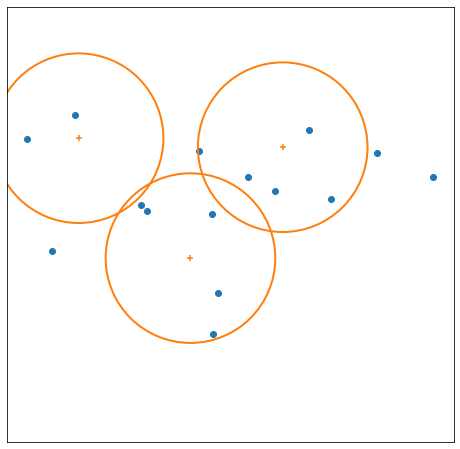

In [19]:
# Number of sites to select
K = 3

# Service radius of each site
radius = 0.15

# Candidate site size (random sites generated)
M = 30

# Run mclp opt_sites is the location of optimal sites and f is the points covered
opt_sites,f = mclp(points,K,radius,M)

# Plot the result
plot_result(points,opt_sites,radius)

In [20]:
opt_sites

array([[126.68552635,  35.04631849],
       [126.52241821,  34.85013858],
       [126.32453067,  35.06221874]])

In [4]:
df = pd.read_csv('D:\\OneDrive - knu.ac.kr\\GitHub\\GIS_project\\01_data/final_data.csv',
                encoding = 'cp949')

In [5]:
df = df.loc[:, ['field8', 'X', 'Y', 'dist', 'IC', 'HAR', 'ss(ha)']]

In [7]:
df[]

,field8,X,Y,dist,IC,HAR,ss(ha)
0,24000,127.123279,36.532122,27.057110,8.337803,69.225756,206
1,7200,127.530748,36.104115,34.823510,13.824096,109.214173,253
2,7200,127.103875,36.239235,6.423749,7.937871,72.700053,394
3,12000,127.168458,36.214471,6.423749,9.649264,78.068621,243
4,12000,127.066841,36.134360,12.104630,5.915126,74.655265,414
5,12000,126.600952,36.910349,13.072230,10.490879,54.713969,265
6,12000,126.691520,36.793728,5.750496,6.702663,51.711954,123
7,12000,126.750703,36.958109,10.036840,5.705124,60.374766,213
8,12000,126.789577,36.873225,7.363879,7.636971,57.442982,217
9,9600,126.804683,36.782853,3.207742,12.270157,55.083156,646


In [7]:
df_2 = df[df['Cluster'] == 2]

In [8]:
df

,field8,X,Y,dist,IC,HAR,ss(ha)
0,24000,127.123279,36.532122,27.057110,8.337803,69.225756,206
1,7200,127.530748,36.104115,34.823510,13.824096,109.214173,253
2,7200,127.103875,36.239235,6.423749,7.937871,72.700053,394
3,12000,127.168458,36.214471,6.423749,9.649264,78.068621,243
4,12000,127.066841,36.134360,12.104630,5.915126,74.655265,414
5,12000,126.600952,36.910349,13.072230,10.490879,54.713969,265
6,12000,126.691520,36.793728,5.750496,6.702663,51.711954,123
7,12000,126.750703,36.958109,10.036840,5.705124,60.374766,213
8,12000,126.789577,36.873225,7.363879,7.636971,57.442982,217
9,9600,126.804683,36.782853,3.207742,12.270157,55.083156,646


In [9]:
# 커버할 DSC의 위치를 points에 저장
RPC_points = df[['X', 'Y']].to_numpy()

In [13]:
df_2[['lon', 'lat']].to_numpy()

array([[126.6720663 ,  34.96956824],
       [126.8530497 ,  35.03521006],
       [126.7714047 ,  34.95551534],
       [126.6243357 ,  34.99396941],
       [126.5609584 ,  34.92882649],
       [126.5719286 ,  34.78799713],
       [126.2341842 ,  35.06090482],
       [126.7317882 ,  35.0763208 ],
       [126.5381428 ,  35.03939045],
       [126.3184662 ,  35.10336106],
       [126.2780704 ,  34.86232417],
       [126.4454931 ,  34.93416271],
       [126.4343801 ,  34.94325622],
       [126.5626171 ,  34.71631536],
       [126.9518787 ,  34.99428121]])

In [28]:
df = pd.read_csv('충남cluster.csv')
df = df.loc[:, ['X', 'Y', 'dist', 'cluster', 'field8']]

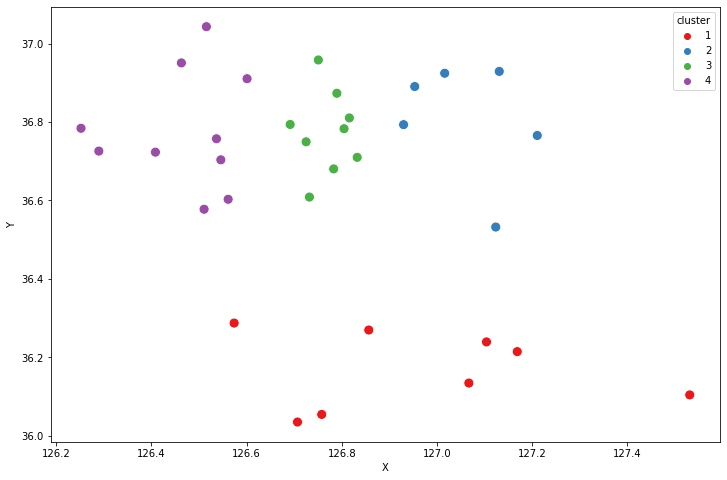

In [8]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'X', y = 'Y', data = df, hue = 'cluster', palette = 'Set1', s = 100)
plt.show()

In [4]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_1.to_numpy())
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(12, 8))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()  

NameError: name 'df_1' is not defined

In [6]:
df_1 = df.drop('cluster', axis = 1)

In [7]:
df_1 = pd.DataFrame(df_1);df_1


,X,Y,dist,field8
0,127.123279,36.532122,27.057110,24000
1,127.530748,36.104115,34.823510,7200
2,127.103875,36.239235,6.423749,7200
3,127.168458,36.214471,6.423749,12000
4,127.066841,36.134360,12.104630,12000
5,126.600952,36.910349,13.072230,12000
6,126.691520,36.793728,5.750496,12000
7,126.750703,36.958109,10.036840,12000
8,126.789577,36.873225,7.363879,12000
9,126.804683,36.782853,3.207742,9600


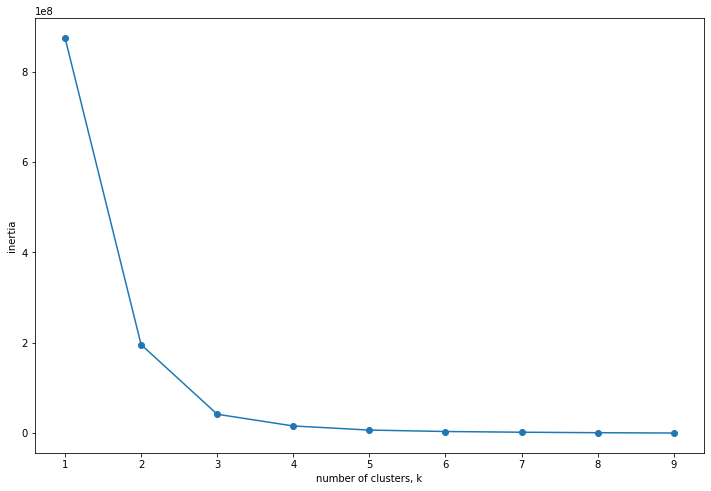

In [9]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(12, 8))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [61]:
df = pd.read_csv('pred_test.csv', index_col=0)

In [13]:
DSC

,lon,lat,pred.y
1,126.417120,36.624318,1.540998
2,126.470546,36.728847,1.170974
3,127.064990,36.752505,1.237846
4,126.376588,36.640868,1.472692
5,126.715737,36.848244,0.882540
6,127.132636,36.220985,1.730702
7,126.565989,36.884929,0.645677
8,126.294920,36.675349,1.310424
9,126.242839,36.721856,1.084378
10,126.990640,36.224928,1.964428


In [14]:
DSC_points = DSC[['lon', 'lat']].to_numpy()

----- Configurations -----
  Number of points 37
  K 6
  Radius 0.15
  M 100000
Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-26
----- Output -----
  Running time : 4.291334867477417 seconds
  Optimal coverage points: 36


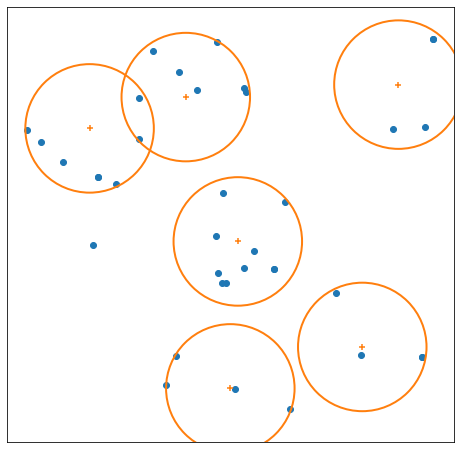

In [19]:
# Number of sites to select
K = 6

# Service radius of each site
radius = 0.15

# Candidate site size (random sites generated)
M = 100000

# Run mclp opt_sites is the location of optimal sites and f is the points covered
opt_sites,f = mclp(DSC_points,K,radius,M)

# Plot the result
plot_result(DSC_points,opt_sites,radius)

In [ ]:
import numpy as np
from scipy.spatial import distance_matrix
from gurobipy import *
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon, Point
from numpy import random

def generate_candidate_sites(points,M=100):
    '''
    Generate M candidate sites with the convex hull of a point set
    Input:
        points: a Numpy array with shape of (N,2)
        M: the number of candidate sites to generate
    Return:
        sites: a Numpy array with shape of (M,2)
    '''
    hull = ConvexHull(points)
    polygon_points = points[hull.vertices]
    poly = Polygon(polygon_points)
    min_x, min_y, max_x, max_y = poly.bounds
    sites = []
    while len(sites) < M:
        random_point = Point([random.uniform(min_x, max_x),
                                random.uniform(min_y, max_y)])
        if (random_point.within(poly)):
            sites.append(random_point)
    return np.array([(p.x,p.y) for p in sites])

def mclp(points,K,radius,M):
    """
    Solve maximum covering location problem
    Input:
        points: input points, Numpy array in shape of [N,2]
        K: the number of sites to select
        radius: the radius of circle
        M: the number of candidate sites, which will randomly generated inside
        the ConvexHull wrapped by the polygon
    Return:
        opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
        f: the optimal value of the objective function
    """
    print('----- Configurations -----')
    print('  Number of points %g' % points.shape[0])
    print('  K %g' % K)
    print('  Radius %g' % radius)
    print('  M %g' % M)
    import time
    start = time.time()
    sites = generate_candidate_sites(points,M)
    J = sites.shape[0]
    I = points.shape[0]
    D = distance_matrix(points,sites)
    mask1 = D<=radius
    D[mask1]=1
    D[~mask1]=0
    # Build model
    m = Model()
    # Add variables
    x = {}
    y = {}
    for i in range(I):
        y[i] = m.addVar(vtype=GRB.BINARY, name="y%d" % i)
    for j in range(J):
        x[j] = m.addVar(vtype=GRB.BINARY, name="x%d" % j)

    m.update()
    # Add constraints
    m.addConstr(quicksum(x[j] for j in range(J)) == K)

    for i in range(I):
        m.addConstr(quicksum(x[j] for j in np.where(D[i]==1)[0]) >= y[i])

    m.setObjective(quicksum(y[i]for i in range(I)),GRB.MAXIMIZE)
    m.setParam('OutputFlag', 0)
    m.optimize()
    end = time.time()
    print('----- Output -----')
    print('  Running time : %s seconds' % float(end-start))
    print('  Optimal coverage points: %g' % m.objVal)
    
    solution = []
    if m.status == GRB.Status.OPTIMAL:
        for v in m.getVars():
            # print v.varName,v.x
            if v.x==1 and v.varName[0]=="x":
                solution.append(int(v.varName[1:]))
    opt_sites = sites[solution]
    return opt_sites,m.objVal

def plot_input(points):
    '''
    Plot the result
    Input:
        points: input points, Numpy array in shape of [N,2]
        opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
        radius: the radius of circle
    '''
    from matplotlib import pyplot as plt
    fig = plt.figure(figsize=(8,8))
    plt.scatter(points[:,0],points[:,1],c='C0')
    ax = plt.gca()
    ax.axis('equal')
    ax.tick_params(axis='both',left=False, top=False, right=False,
                        bottom=False, labelleft=False, labeltop=False,
                        labelright=False, labelbottom=False)

def plot_result(points,opt_sites,radius):
    '''
    Plot the result
    Input:
        points: input points, Numpy array in shape of [N,2]
        opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
        radius: the radius of circle
    '''
    from matplotlib import pyplot as plt
    fig = plt.figure(figsize=(8,8))
    plt.scatter(points[:,0],points[:,1],c='C0')
    ax = plt.gca()
    plt.scatter(opt_sites[:,0],opt_sites[:,1],c='C1',marker='+')
    for site in opt_sites:
        circle = plt.Circle(site, radius, color='C1',fill=False,lw=2)
        ax.add_artist(circle)
    ax.axis('equal')
    ax.tick_params(axis='both',left=False, top=False, right=False,
                        bottom=False, labelleft=False, labeltop=False,
                        labelright=False, labelbottom=False)

In [41]:
from matplotlib import pyplot as plt
def plot_all_DSC(points,opt_sites,radius,RPC):
    # RPC : 기존 RPC 위치 2차원 행렬
    fig = plt.figure(figsize=(12,12))
    plt.scatter(points[:,0],points[:,1],c='C0', label = 'DSC')
    ax = plt.gca()
    plt.scatter(opt_sites[:,0],opt_sites[:,1],c='C1',marker='+', label = 'optimal_sites')
    for site in opt_sites:
        circle = plt.Circle(site, radius, color='C1',fill=False,lw=2)
        ax.add_artist(circle)
    ax.axis('equal')
    ax.tick_params(axis='both',left=False, top=False, right=False,
                        bottom=False, labelleft=False, labeltop=False,
                        labelright=False, labelbottom=False)
    plt.scatter(RPC[:,0], RPC[:,1], c='C3', label = 'RPC')
    plt.legend()
def plot_all_RPC(points,opt_sites,radius,RPC):
    # RPC : 기존 RPC 위치 2차원 행렬
    fig = plt.figure(figsize=(12,12))
    plt.scatter(points[:,0],points[:,1],c='C3', label = 'RPC')
    ax = plt.gca()
    plt.scatter(opt_sites[:,0],opt_sites[:,1],c='C1',marker='+', label = 'optimal_sites')
    for site in opt_sites:
        circle = plt.Circle(site, radius, color='C1',fill=False,lw=2)
        ax.add_artist(circle)
    ax.axis('equal')
    ax.tick_params(axis='both',left=False, top=False, right=False,
                        bottom=False, labelleft=False, labeltop=False,
                        labelright=False, labelbottom=False)
    plt.scatter(RPC[:,0], RPC[:,1], c='C0', label = 'DSC')
    plt.legend()

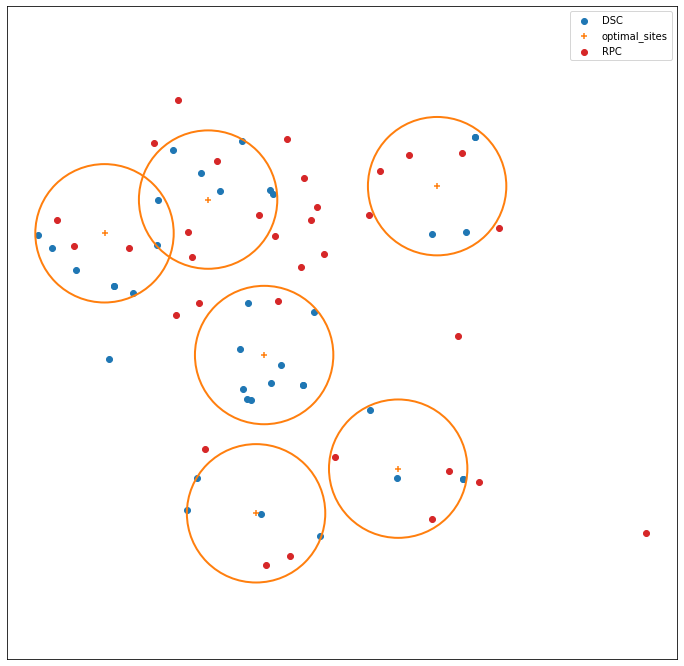

In [22]:
plot_all(DSC_points, opt_sites, radius, RPC_points)

In [32]:
plot_all(RPC_points, opt_sites, radius, DSC_points)

----- Configurations -----
  Number of points 33
  K 6
  Radius 0.15
  M 100000
----- Output -----
  Running time : 4.911395072937012 seconds
  Optimal coverage points: 29


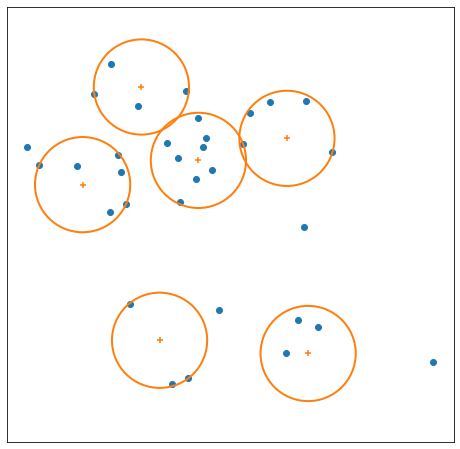

In [48]:
# Number of sites to select
K = 6

# Service radius of each site
radius = 0.15

# Candidate site size (random sites generated)
M = 100000

# Run mclp opt_sites is the location of optimal sites and f is the points covered
RPC_opt_sites,f = mclp(RPC_points,K,radius,M)

# Plot the result
plot_result(RPC_points, RPC_opt_sites, radius)

----- Configurations -----
  Number of points 37
  K 6
  Radius 0.15
  M 100000
----- Output -----
  Running time : 4.369092226028442 seconds
  Optimal coverage points: 36


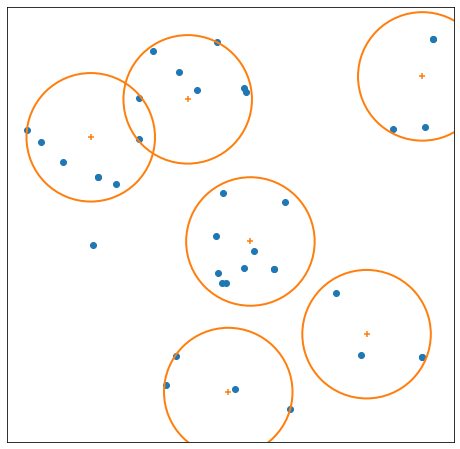

In [28]:
# Number of sites to select
K = 6

# Service radius of each site
radius = 0.15

# Candidate site size (random sites generated)
M = 100000

# Run mclp opt_sites is the location of optimal sites and f is the points covered
DSC_opt_sites,f = mclp(DSC_points,K,radius,M)

# Plot the result
plot_result(DSC_points, DSC_opt_sites, radius)

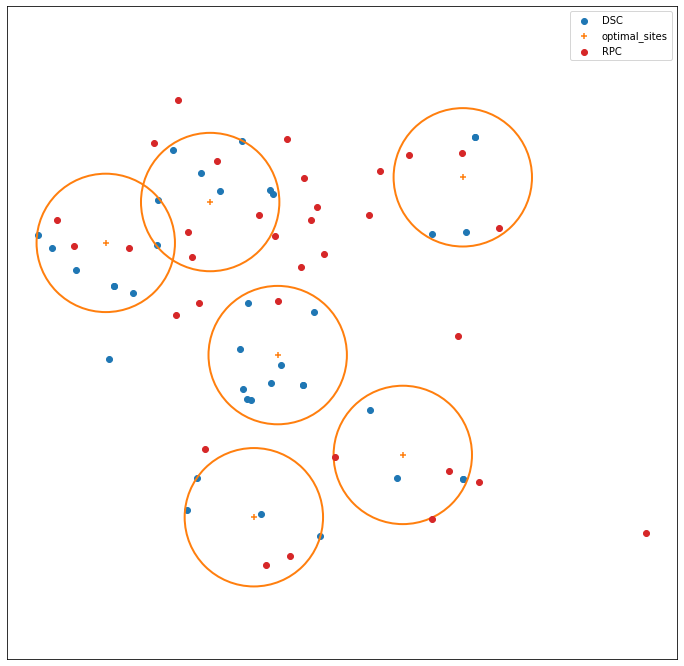

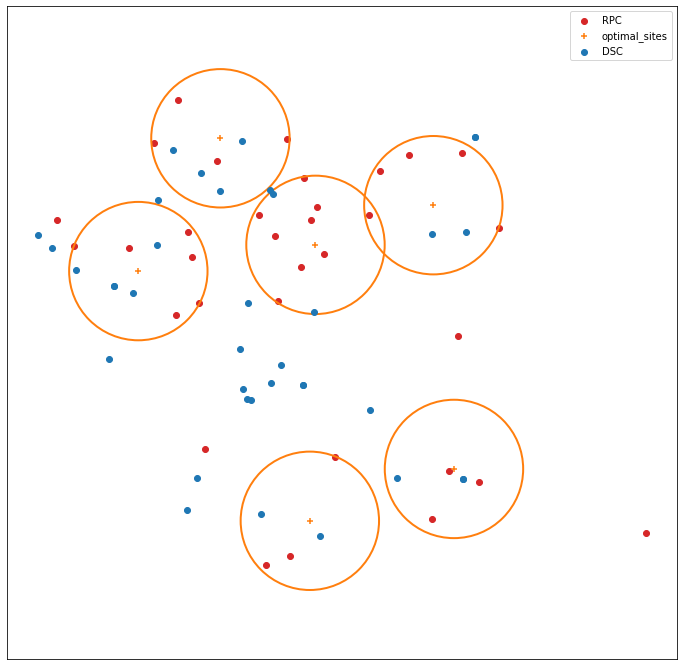

In [46]:

plot_all_DSC(DSC_points, DSC_opt_sites, radius, RPC_points)
plot_all_RPC(RPC_points, RPC_opt_sites, radius, DSC_points)

In [47]:
print(RPC_opt_sites)
print(DSC_opt_sites)

[[127.11366648  36.2434963 ]
 [127.06895637  36.81524319]
 [126.42942402  36.67239461]
 [126.81346704  36.72927157]
 [126.60739244  36.96027711]
 [126.80122542  36.13107363]]
[[126.73155314  36.49030365]
 [127.13280098  36.87569448]
 [127.00272619  36.2738885 ]
 [126.67984947  36.13878243]
 [126.58517477  36.82209541]
 [126.3588116   36.73353194]]


In [58]:
def search(arr, df):
    for i in range(len(arr)):
        x = arr[i][0]
        y = arr[i][1]
        for j in range(len(df)):
            if df.iloc[j,0] > (x - 0.15) and df.iloc[j,0] < (x + 0.15) and df.iloc[j,1] > (y - 0.15) and df.iloc[j,1] < (y + 0.15):
                df.iloc[j,2] = i
                

In [59]:
search(DSC_opt_sites, DSC)

In [65]:
df.rename(columns = {'pred.y': 'index'}, inplace = True)

In [67]:
df = df.iloc[:,2]

In [71]:
summit = pd.concat([DSC, df], axis=1)

In [72]:
summit.groupby('pred.y')['index'].mean()

pred.y
0.000000    1.924885
1.000000    1.049969
2.000000    1.832337
2.050798    2.050798
3.000000    2.567441
4.000000    0.687026
5.000000    1.222207
Name: index, dtype: float64

In [74]:
DSC_opt_sites

array([[126.73155314,  36.49030365],
       [127.13280098,  36.87569448],
       [127.00272619,  36.2738885 ],
       [126.67984947,  36.13878243],
       [126.58517477,  36.82209541],
       [126.3588116 ,  36.73353194]])

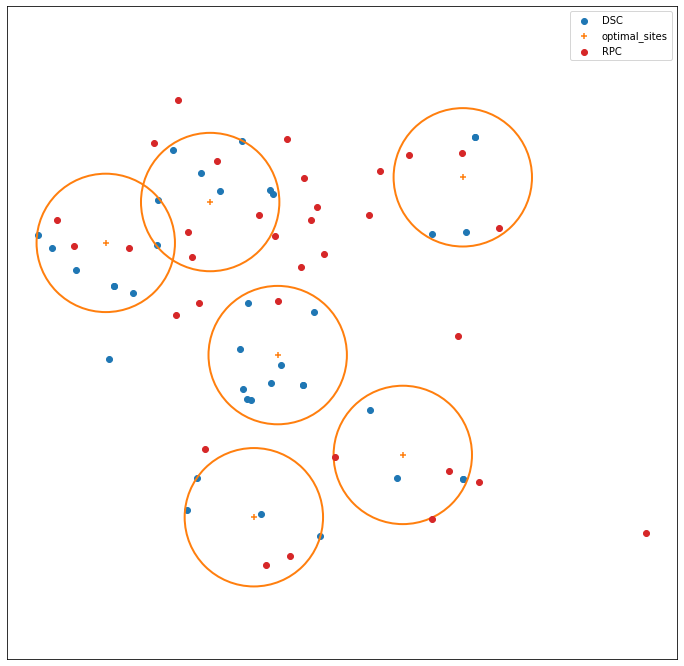

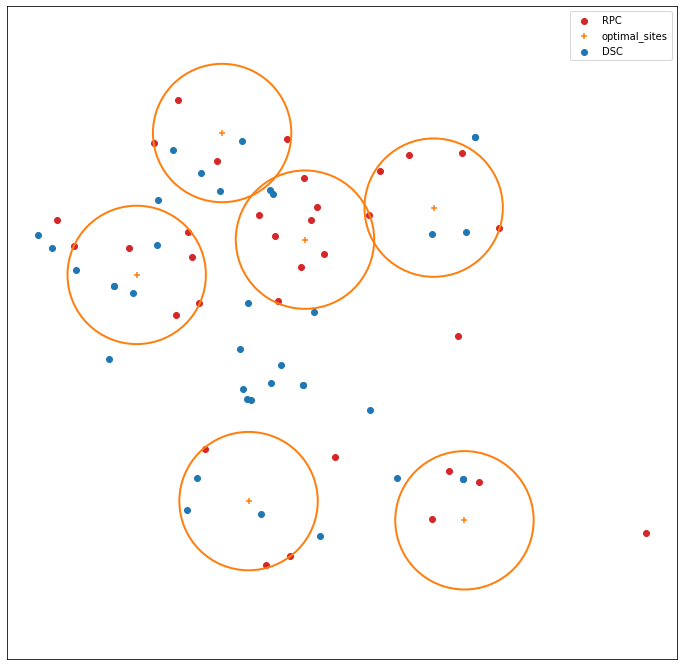

In [73]:
plot_all_DSC(DSC_points, DSC_opt_sites, radius, RPC_points)
plot_all_RPC(RPC_points, RPC_opt_sites, radius, DSC_points)